# Introduction to Convolutional Neural Networks - Image analysis

## Overview 

This kernel is aimed at giving a simple understanding of a Convolutional Neural Network (CNN). This will be achieved in the following order:

- Understanding the operation of convolution
- A short look back Neural Networks
- Data preprocessing
- Understanding the Convolutional Neural Network used
- Understanding Optimizers
- Understanding ImageDataGenerator
- Making the predictions and calculating the accuracy

## What is Convolution?

<b>Definition:</b>
   - In mathematics, convolution is a mathematical operation between two functions (f and g) to produce a third function that expresses how the shape of one is modified by the other.

<b>Utility:</b>
   - Convolution is used in several areas such as probability, statistics, computer vision, natural language processing, image and signal processing, engineering, and differential equations.
   
<b>Mathematical representation:</b>
   <img src="images/convolution_op.png" width="300" height="500">    

## What are Artificial Neural Networks?

<b>Definition: </b>
   - Artificial neural networks (ANN) or connectionist systems are computing systems vaguely inspired by the biological neural networks that constitute animal brains. Such systems "learn" to perform tasks by considering examples, generally without being programmed with any task-specific rules.
   - An ANN is a collection of smaller processing units called the artificial neurons which loosely resemble the biological neuron.
   - A collection of interconnected circuits make a network. </b>

    <img src="images/nn.png" width="300" height="400">

   - In the image above:
       - each circular node represents an artificial neuron.
       - an arrow represents a connection from the output of one artificial neuron to the input of another.

## What are Convolutional Neural Networks

<b>Definition:</b>
   - In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of artificial neural network (ANN), most commonly applied to analyze visual imagery.
   - CNNs were inspired by biological processes in that the connectivity pattern between neurons resembles the organization of the animal visual cortex. 
   - A CNN architecture is formed by a stack of distinct layers that transform the input volume into an output volume through a differentiable function. A few distinct types of layers are commonly used. 
   
<b>Convolutional layer:</b>
   - The convolutional layer is the core building block of a CNN. The layer's parameters consist of a set of learnable filters (or kernels), which have a small receptive field, but extend through the full depth of the input volume. 
   - During the forward pass, each filter is convolved across the width and height of the input volume, computing the dot product between the filter entries and the input, producing a 2-dimensional activation map of that filter. As a result, the network learns filters that activate when it detects some specific type of feature at some spatial position in the input.
      
      <img src="https://miro.medium.com/max/1400/1*Fw-ehcNBR9byHtho-Rxbtw.gif" width="500" height="340">
      
<b>Pooling Layer</b>
   - There are several non-linear functions to implement pooling, where max pooling is the most common.
   - It partitions the input image into a set of rectangles and, for each such sub-region, outputs the maximum.
   
   <img src="https://nico-curti.github.io/NumPyNet/NumPyNet/images/maxpool.gif" width="500" height="340">

# Understand CNN - Let's code!

Solving classification problems:
   - Handwriting recognition of Arabic Alphabets
   - MNIST

## Importing necesarry libraries

In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tflearn.data_utils as du
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau 
from tensorflow.keras.optimizers import SGD
import tensorflow as tf

%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')
np.set_printoptions(suppress=True)

## Handwriting recognition of Arabic Alphabets

### Loading the data set 


In [281]:
train_data = pd.read_csv('dataset/arabic/csvTrainImages 13440x1024.csv', header = None)
train_label = pd.read_csv('dataset/arabic/csvTrainLabel 13440x1.csv', header = None)
test_data = pd.read_csv('dataset/arabic/csvTestImages 3360x1024.csv', header = None)
test_label = pd.read_csv('dataset/arabic/csvTestLabel 3360x1.csv', header = None)

In [282]:
# train_label

In [283]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13440 entries, 0 to 13439
Columns: 1024 entries, 0 to 1023
dtypes: int64(1024)
memory usage: 105.0 MB


In [284]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Columns: 1024 entries, 0 to 1023
dtypes: int64(1024)
memory usage: 26.3 MB


In [285]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
count,13440.000000,13440.000000,13440.000000,13440.000000,13440.000000,13440.000000,13440.000000,13440.000000,13440.000000,13440.000000,...,13440.000000,13440.000000,13440.000000,13440.000000,13440.000000,13440.000000,13440.000000,13440.000000,13440.000000,13440.000000
mean,0.121577,0.021354,0.009747,0.011310,0.019048,0.005357,0.005060,0.020908,0.033333,0.042708,...,0.302455,0.221131,0.240774,0.295089,0.373512,0.355060,0.293080,0.242113,0.306176,0.931027
std,2.832336,0.956019,0.699926,0.826053,2.199600,0.621059,0.552589,1.438708,2.336252,2.397563,...,6.420500,4.900565,5.456679,5.841086,7.395038,7.146192,5.845676,4.902063,5.348576,8.753527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,128.000000,81.000000,59.000000,87.000000,255.000000,72.000000,64.000000,151.000000,236.000000,172.000000,...,255.000000,247.000000,255.000000,251.000000,255.000000,255.000000,244.000000,241.000000,224.000000,255.000000


In [286]:
train_data = train_data.iloc[:,:].values.astype('float32')
train_label = train_label.iloc[:,:].values.astype('int32') - 1
test_data = test_data.iloc[:,:].values.astype('float32')
test_label = test_label.iloc[:,:].values.astype('int32') - 1

### Visualizing the data set

In [287]:
def row_calculator(number_of_images, number_of_columns):
    if number_of_images % number_of_columns != 0:
        return (number_of_images // number_of_columns) + 1
    else:
        return (number_of_images // number_of_columns)

In [288]:
def display_image(x, img_size, number_of_images):
    plt.figure(figsize = (8, 7))
    if x.shape[0] > 0:
        n_samples = x.shape[0]
        x = x.reshape(n_samples, img_size, img_size)
        number_of_rows = row_calculator(number_of_images, 4)
        for i in range(number_of_images):
            plt.subplot(number_of_rows, 4, i+1)
            plt.imshow(x[i])

### The training set examples

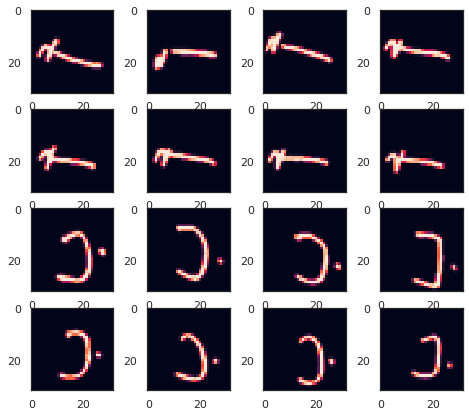

In [289]:
display_image(train_data, 32, 16)

### The test set  examples

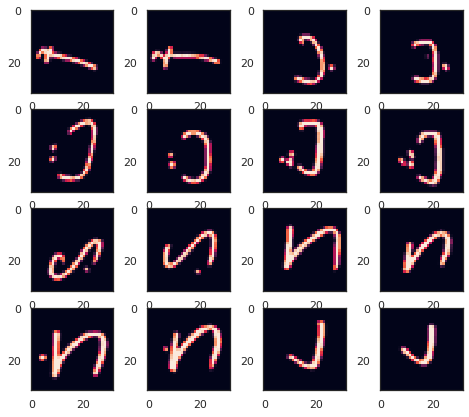

In [290]:
display_image(test_data, 32, 16)

### Data set preprocessing
#### Encoding categorical variables 

<b> What are Categorical Variables? </b>
   - In statistics, a categorical variable is a variable that can take on one of a limited, and usually fixed number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property.
   - In simple terms, the value of a categorical varibale, represents a category or a class.

In [291]:
train_label = du.to_categorical(train_label, 28)

In [292]:
train_label.shape

(13440, 28)

#### Normalization
<b> What is Normalization? </b>
   - Normalization is done to bring the entire data into a well defined range, preferably between 0 and 1.

In [293]:
train_data = train_data / 255
test_data = test_data / 255

Reshape the data to represent a 2D image.

In [294]:
train_data = train_data.reshape([-1, 32, 32, 1])
test_data = test_data.reshape([-1, 32, 32, 1])

#### Split train data into train and validation sets
Split the train data set in two parts: 
- 25% - validation set
- 75% - train set

In [295]:
train_data, data_val, train_label, label_val = train_test_split(
                                                    train_data,
                                                    train_label,
                                                    test_size = 0.25,
                                                    random_state=20,
                                                    shuffle=True)

### Building the CNN 

In [296]:
model = Sequential()

In [297]:
model.add(Conv2D(filters = 32,
                 kernel_size = 5,
                 padding = 'Same', 
                 activation ='relu', 
                 input_shape = (32, 32, 1)))
model.add(Conv2D(filters = 32, 
                 kernel_size = (5, 5),
                 padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [298]:
model.add(Conv2D(filters = 64, 
                 kernel_size = (3, 3),
                 padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, 
                 kernel_size = (3, 3),
                 padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2, 2),
                    strides=(2, 2)))
model.add(Dropout(0.25))

In [299]:
model.add(Flatten())
model.add(Dense(units = 256, input_dim = 1024, activation = 'relu'))
model.add(Dense(units = 256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(28, activation = "softmax"))

#### Model summary

In [300]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
__________

#### What is Conv2D?
   - Conv2D layer - is like a set of learnable filters. Each filter transform a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.
   
       <img src="https://miro.medium.com/max/1216/1*aRrWvkaLiCf_ryTkahsTeA.png" width="500" height="400">

   
   <b>Conv2D Hyperparameters:</b>
   - <i>Kernel size</i> - the number of pixels processed together.
   - <i>Padding</i> - Padding is the addition of (typically) 0-valued pixels on the borders of an image. This is done so that the border pixels are not undervalued (lost) from the output because they would ordinarily participate in only a single receptive field instance. The padding applied is typically one less than the corresponding kernel dimension. For example, a convolutional layer using 3x3 kernels would receive a 2-pixel pad on all sides of the image.
   - <i>Stride</i> - the number of pixels that the analysis window moves on each iteration. A stride of 2 means that each kernel is offset by 2 pixels from its predecessor.
   - <i>Number of filters</i> - Since feature map size decreases with depth, layers near the input layer tend to have fewer filters while higher layers can have more. 

#### What is Max Pooling?
   - Pooling means combining a set of data. The process of combining data follows some rules.
   - By definition, it selects the maximum element from the region of the feature map covered by the filter. For this layer, the pooling size (the area size pooled each time) must be chosen.
   - Max pooling is used to reduce the dimensions. It can also avoid overfitting.

#### What is Dropout?
   - Dropout is a regularization technique for reducing overfitting in neural networks. The term "dropout" refers to dropping out units (both hidden and visible) in a neural network. 
   - A proportion of nodes in the layer are randomly ignored (their weights are setted to zero). This forces the network to learn features in a distributed way and also drops a randomly proportion of the network.

#### What is Flatten?
   - Flattening is done to convert the multidimensional data into a single 1D feature vector to be used by the next layer which is the Dense Layer. It combines all the found local features on the previous convolutional layers. 

#### What is a Dense Layer?
   - The Dense layer is just a layer of Artificial Neural Network
  
### Set the optimizer and LR 

#### What is an optimizer?
   - Optimization algorithms helps us to minimize (or maximize) an Objective function (another name for Error function) E(x) which is simply a mathematical function dependent on the model’s internal learnable parameters which are used in computing the target values (Y) from the set of predictors (X) used in the model.

#### What is learning rate?
- The learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.
- The learning rate determines how big a step is taken in that direction.

#### What is a loss function?
- Loss function is defined to measure how poorly our model performs on images with known labels. It represents the error rate between the oberved labels and the predicted ones.

In [301]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [302]:
model.compile(optimizer="RMSProp",
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

### Data augmentation

- expand artificially the data set to avoid the overfitting problem
- alter training data with small transformations to reproduce the variations occuring when someone is writing a letter.


In [303]:
datagen = ImageDataGenerator(
            rotation_range=10, # randomly rotate images in the range (degrees, 0 to 180)
            zoom_range = 0.1,  # randomly zoom image 
            width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=False,
            vertical_flip=False
            )

In [304]:
datagen.fit(train_data)

### Fitting the CNN to the training data

In [305]:
history = model.fit_generator(datagen.flow(train_data,
                                           train_label,
                                           batch_size=100),
                    epochs=30, 
                    validation_data = (data_val, label_val),
                    verbose=1, 
                    steps_per_epoch=train_data.shape[0] // 100)

Epoch 1/30
101/101 [==============================] - 2s 22ms/step - loss: 2.6973 - acc: 0.1902 - val_loss: 1.5481 - val_acc: 0.5000
Epoch 2/30
101/101 [==============================] - 2s 19ms/step - loss: 1.6635 - acc: 0.4474 - val_loss: 0.8553 - val_acc: 0.7220
Epoch 3/30
101/101 [==============================] - 2s 19ms/step - loss: 1.1959 - acc: 0.5936 - val_loss: 0.5731 - val_acc: 0.8071
Epoch 4/30
101/101 [==============================] - 2s 20ms/step - loss: 0.9344 - acc: 0.6814 - val_loss: 0.6382 - val_acc: 0.7923
Epoch 5/30
101/101 [==============================] - 2s 21ms/step - loss: 0.7738 - acc: 0.7350 - val_loss: 0.4477 - val_acc: 0.8500
Epoch 6/30
101/101 [==============================] - 2s 20ms/step - loss: 0.6436 - acc: 0.7818 - val_loss: 0.2994 - val_acc: 0.9012
Epoch 7/30
101/101 [==============================] - 2s 19ms/step - loss: 0.5560 - acc: 0.8089 - val_loss: 0.3021 - val_acc: 0.9003
Epoch 8/30
101/101 [==============================] - 2s 21ms/step - 

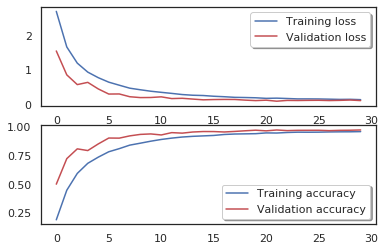

In [306]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], 
           color='b', 
           label="Training loss")
ax[0].plot(history.history['val_loss'],
           color='r', 
           label="Validation loss",
           axes =ax[0])
legend = ax[0].legend(loc='best',
                      shadow=True)

ax[1].plot(history.history['acc'],
           color='b', 
           label="Training accuracy")
ax[1].plot(history.history['val_acc'], 
           color='r',
           label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### Making the predictions

In [307]:
predictions = model.predict(test_data)
predictions = np.argmax(predictions, axis=1)

#### Generating a confusion matrix
###### What is a Confusion matrix?
- A confusion matrix is a technique for summarizing the performance of a classification algorithm. Classification accuracy alone can be misleading if you have an unequal number of observations in each class or if you have more than two classes in your dataset. Calculating a confusion matrix can give you a better idea of what your classification model is getting right and what types of errors it is making.

In [308]:
cm = confusion_matrix(test_label, predictions)

In [309]:
labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", 
          "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", 
          "21", "22", "23", "24", "25", "26", "27", "28"]

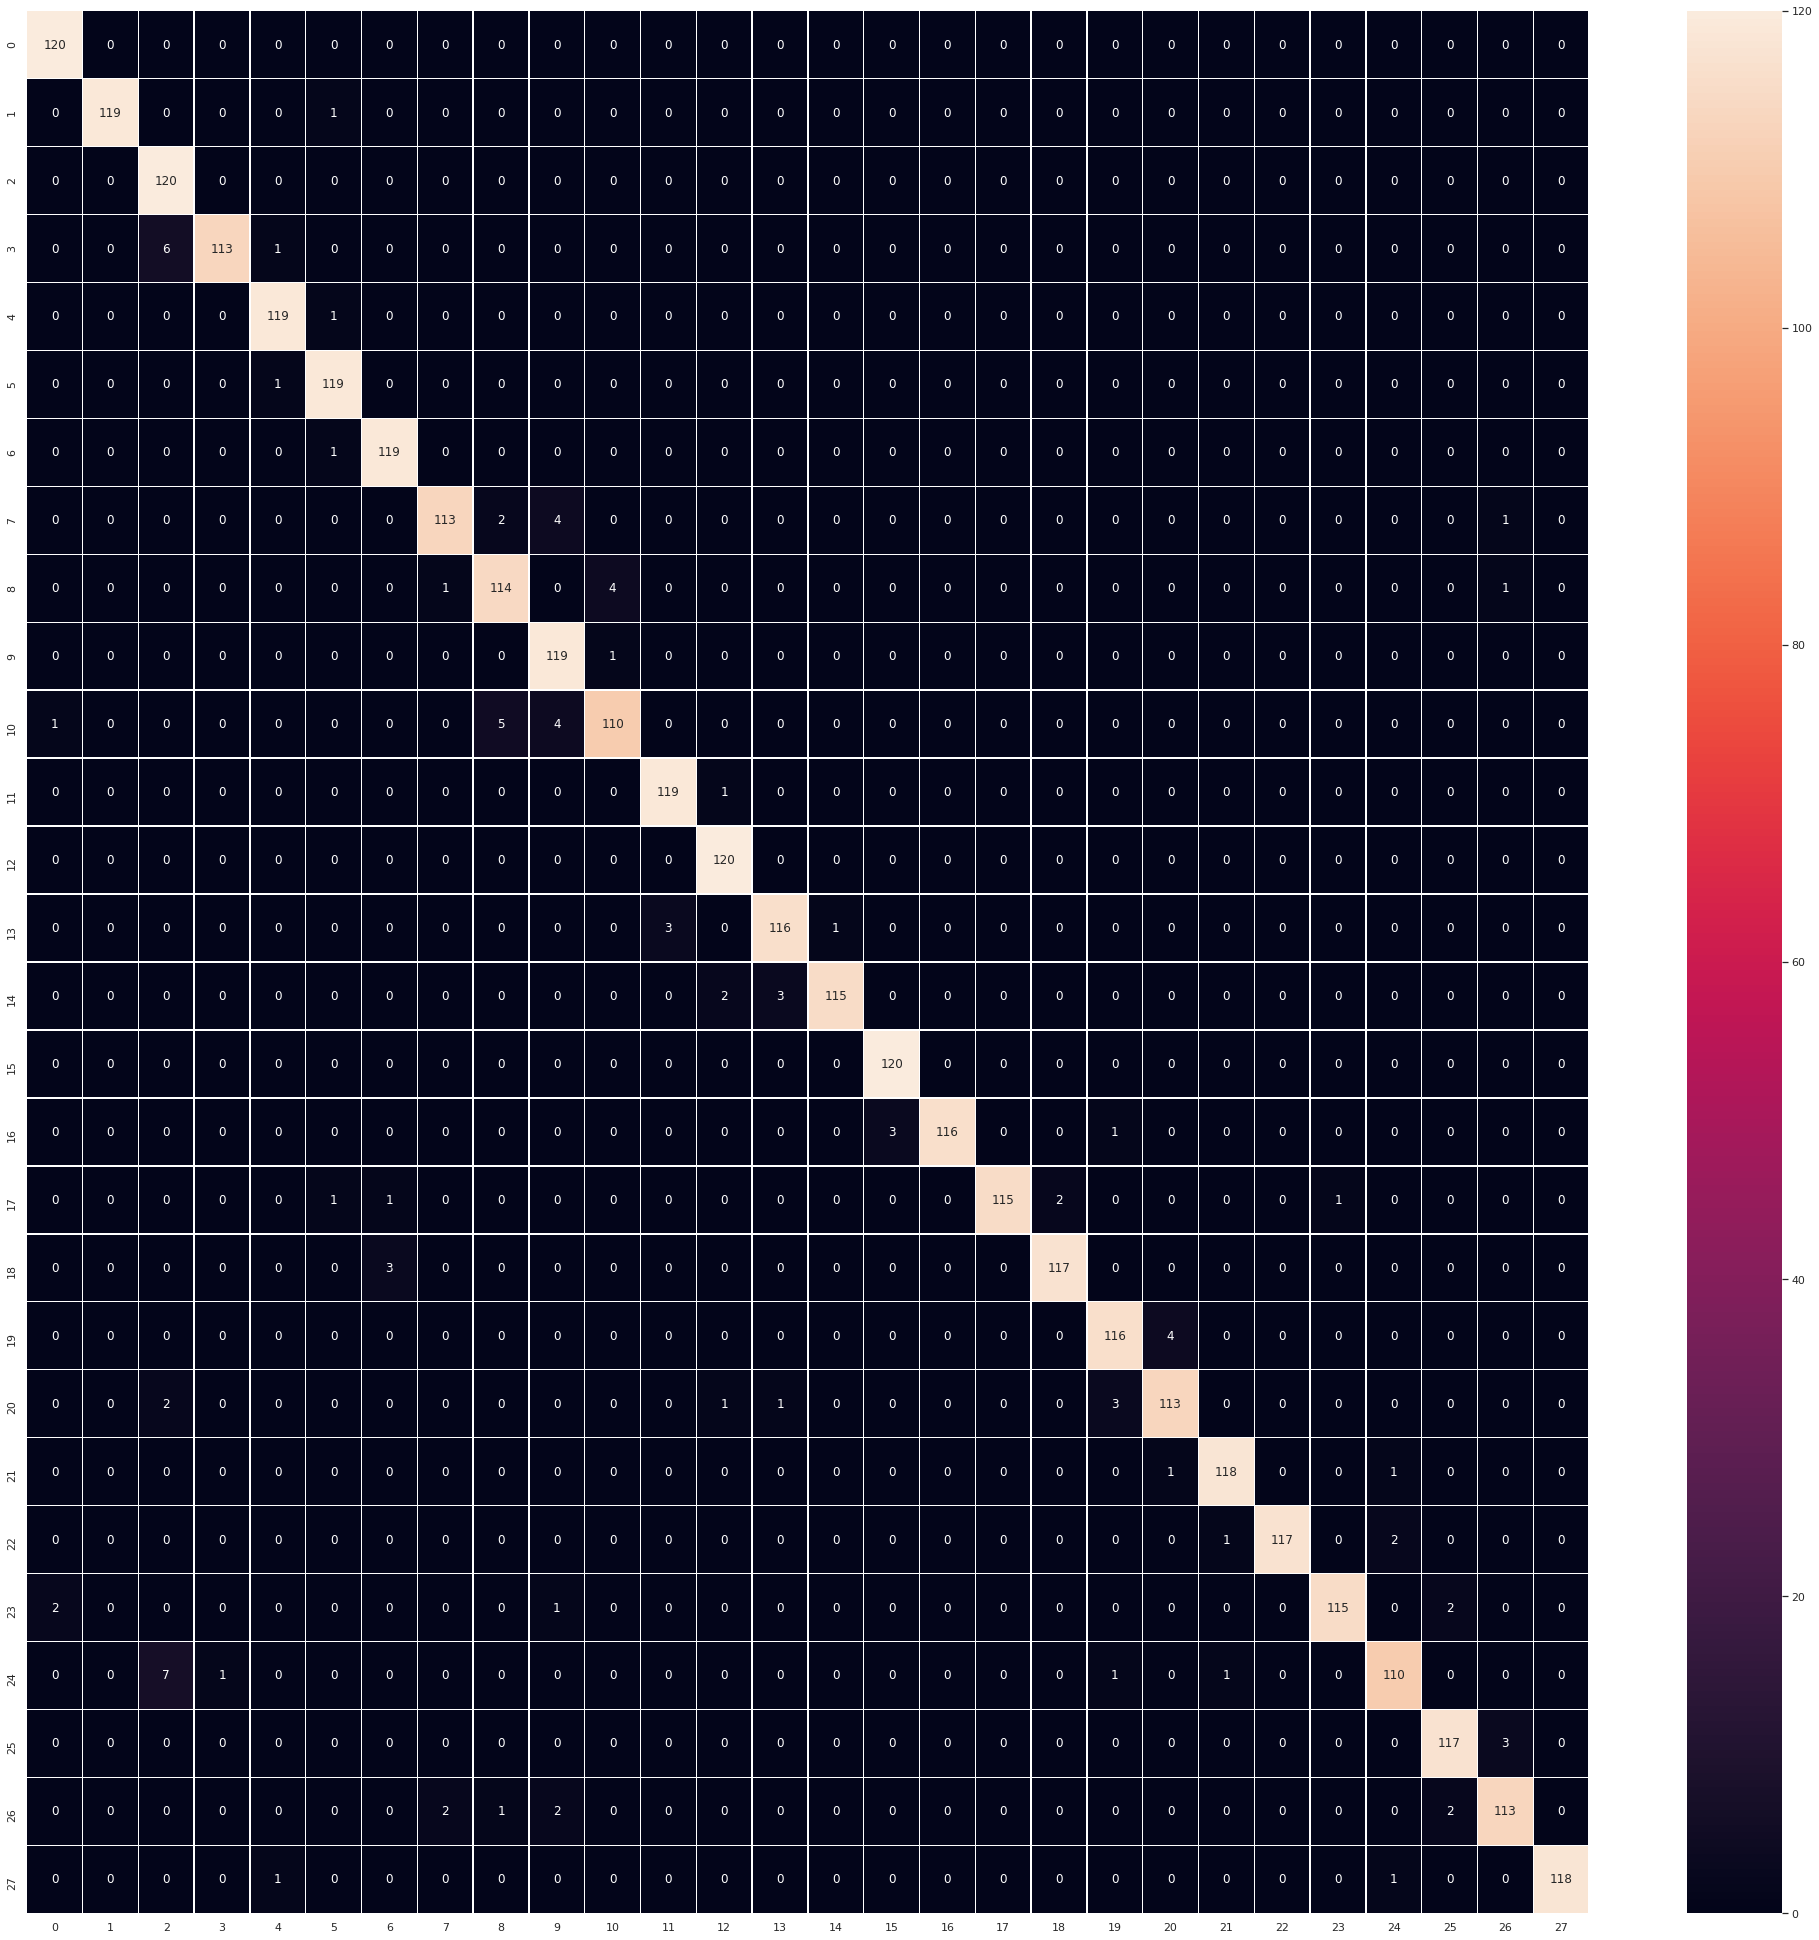

In [310]:
fig, ax = plt.subplots(figsize=(35, 35))
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax, fmt='')

#### Calculating the accuracy
- "accuracy" - metric function is used to evaluate the performance the model. This function usage is only for evaluation, the results are no used when training the model.

In [311]:
accuracy = sum(cm[i][i] for i in range(28)) / test_label.shape[0]
print("accuracy = " + str(accuracy))

accuracy = 0.9702380952380952


In [312]:
from sklearn.metrics import classification_report

In [313]:
print(classification_report(test_label, predictions, target_names=labels))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       120
           2       1.00      0.99      1.00       120
           3       0.89      1.00      0.94       120
           4       0.99      0.94      0.97       120
           5       0.98      0.99      0.98       120
           6       0.97      0.99      0.98       120
           7       0.97      0.99      0.98       120
           8       0.97      0.94      0.96       120
           9       0.93      0.95      0.94       120
          10       0.92      0.99      0.95       120
          11       0.96      0.92      0.94       120
          12       0.98      0.99      0.98       120
          13       0.97      1.00      0.98       120
          14       0.97      0.97      0.97       120
          15       0.99      0.96      0.97       120
          16       0.98      1.00      0.99       120
          17       1.00      0.97      0.98       120
          18       1.00    

In [314]:
model.evaluate(train_data, train_label)

10080/10080 [==============================] - 1s 79us/sample - loss: 0.0394 - acc: 0.9881


[0.03939251357926026, 0.9880952]

In [315]:
model.evaluate(data_val, label_val)

3360/3360 [==============================] - 0s 82us/sample - loss: 0.1107 - acc: 0.9714


[0.11073292617996534, 0.9714286]

In [316]:
test_labels_cat = du.to_categorical(test_label, 28)

In [317]:
model.evaluate(test_data, test_labels_cat)

3360/3360 [==============================] - 0s 83us/sample - loss: 0.1102 - acc: 0.9702


[0.11020134100468741, 0.9702381]

## MNIST

### Loading the dataset

In [318]:
train_data = pd.read_csv("dataset/mnist/train.csv")
test_data = pd.read_csv("dataset/mnist/test.csv")

In [319]:
y_train = train_data['label']
x_train = train_data.drop(labels = ["label"], axis=1)

Labels are 10 digits numbers from 0 to 9.

In [320]:
y_train[0]

1

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

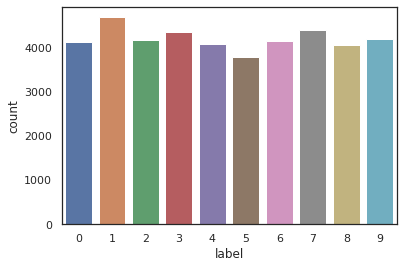

In [321]:
g = sns.countplot(y_train)
y_train.value_counts()

### Check for null and missing values

- check if there are corrupt images in the dataset

In [322]:
x_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [323]:
test_data.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

### Dataset preprocessing

#### Normalization

In [324]:
x_train = x_train / 255.0
test_data = test_data / 255.0

#### Reshape

In [325]:
# (height = 28px, width=28px, canal=1)
x_train = x_train.values.reshape(-1, 28, 28, 1)
test_data = test_data.values.reshape(-1, 28, 28, 1)

#### Label enconding

In [328]:
# convert labels to one hot vectors
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)

In [327]:
y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### Split training and validation set

Split the train data set in two parts: 
- 25% - validation set
- 75% - train set

In [250]:
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size = 0.25,
                                                  random_state=20,
                                                  shuffle=True)

### Building the CNN

#### Define the model


In [251]:
model = Sequential()

In [252]:
model.add(Conv2D(filters = 32, 
                 kernel_size = (5, 5),
                 padding = 'Same', 
                 activation ='relu',
                 input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 32, 
                 kernel_size = (5,5),
                 padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

In [253]:
model.add(Conv2D(filters = 64, 
                 kernel_size = (3,3),
                 padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, 
                 kernel_size = (3,3),
                 padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [254]:
model.add(Flatten())

In [255]:
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

#### Model summary

In [256]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
__________

### Set the optimizer and LR
   - SGD - (stochastic gradient descent) randomly picks one data point from the whole data set at each iteration to reduce the computations enormously.

In [257]:
model.compile(optimizer = SGD(lr=0.01), loss = "categorical_crossentropy", metrics=["accuracy"])

- ReduceLROnPlateau is used to reduce the learning rate by half if the accuracy is not improved after 3 epochs

In [258]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [259]:
epochs = 40
batch_size = 64

### Data augmentation

In [260]:
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  
        vertical_flip=False 
) 

datagen.fit(x_train)

### Fitting the model to train the data

In [261]:
history = model.fit_generator(datagen.flow(x_train, 
                                           y_train, 
                                           batch_size=batch_size),
                              epochs = epochs, 
                              validation_data = (x_val, y_val),
                              verbose = 1, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction])

Epoch 1/40
492/492 [==============================] - 6s 12ms/step - loss: 2.0028 - acc: 0.2775 - val_loss: 0.7306 - val_acc: 0.8165
Epoch 2/40
492/492 [==============================] - 5s 11ms/step - loss: 0.8714 - acc: 0.7099 - val_loss: 0.2063 - val_acc: 0.9462
Epoch 3/40
492/492 [==============================] - 5s 11ms/step - loss: 0.4918 - acc: 0.8452 - val_loss: 0.1341 - val_acc: 0.9623
Epoch 4/40
492/492 [==============================] - 5s 11ms/step - loss: 0.3678 - acc: 0.8848 - val_loss: 0.1105 - val_acc: 0.9675
Epoch 5/40
492/492 [==============================] - 5s 11ms/step - loss: 0.3058 - acc: 0.9078 - val_loss: 0.0934 - val_acc: 0.9733
Epoch 6/40
492/492 [==============================] - 5s 11ms/step - loss: 0.2721 - acc: 0.9167 - val_loss: 0.0868 - val_acc: 0.9743
Epoch 7/40
492/492 [==============================] - 5s 11ms/step - loss: 0.2374 - acc: 0.9279 - val_loss: 0.0857 - val_acc: 0.9740
Epoch 8/40
492/492 [==============================] - 5s 11ms/step - 

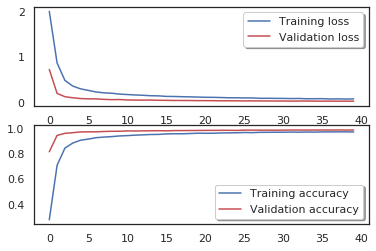

In [262]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [263]:
preds = model.predict(x_val)
pred_classes = np.argmax(preds, axis = 1) 
y_true = np.argmax(y_val, axis = 1) 
mat = confusion_matrix(y_true, pred_classes) 
mat2 = np.zeros((10, 10,))

for i in range(10):
    sm = sum(mat[i]) 
    for j in range(10):
        x = mat[i][j] / sm
        mat2[i][j] = x

In [264]:
preds[0]

array([0.00000096, 0.        , 0.99988616, 0.00008696, 0.        ,
       0.        , 0.00000002, 0.00000027, 0.00002557, 0.        ],
      dtype=float32)

In [265]:
import pandas as pd
mat2_arr = np.array(mat2)
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
conf_mat_test = pd.DataFrame(data=mat2_arr, columns=labels, index=labels)

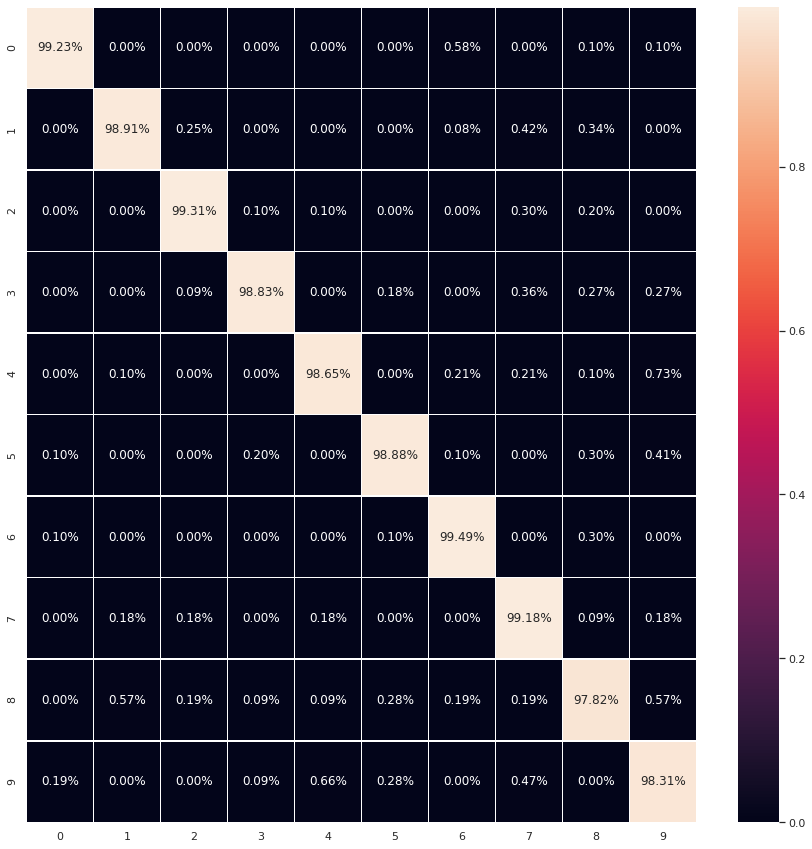

In [266]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(conf_mat_test, annot=True, linewidths=.5, ax=ax, fmt='.2%')

In [267]:
model.evaluate(x_train, y_train)

31500/31500 [==============================] - 2s 79us/step


[0.024674122712382722, 0.9923809523809524]

In [269]:
model.evaluate(x_val, y_val)

10500/10500 [==============================] - 1s 76us/step


[0.0352285335339312, 0.9885714285714285]

### Errors in prediction

Errors are difference between predicted labels and true labels.


In [270]:
errors = (pred_classes - y_true != 0) 
pred_classes_errors = pred_classes[errors]
pred_errors = preds[errors]
y_true_errors = y_true[errors]
x_val_errors = x_val[errors]

Compute the probabilities of the wrong predicted numbers.

In [271]:
y_pred_errors_prob = np.max(pred_errors, axis = 1) 

Compute predicted probabilities of the true values in the error set.

In [272]:
true_prob_errors = np.diagonal(np.take(pred_errors, y_true_errors, axis=1)) 

Compute the difference between the probability of the predicted label and the true label.

In [273]:
delta_pred_true_errors = y_pred_errors_prob - true_prob_errors

Sort the list of the delta probability errors.


In [274]:
sorted_dela_errors = np.argsort(delta_pred_true_errors)

Analyse top 6 errors.

In [275]:
most_important_errors = sorted_dela_errors[-6:]

In [278]:
def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,
                           ncols,
                           sharex=True,
                           sharey=True, figsize=(15, 15))

    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)), cmap='gray')
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],
                                                                               obs_errors[error]))
            n += 1

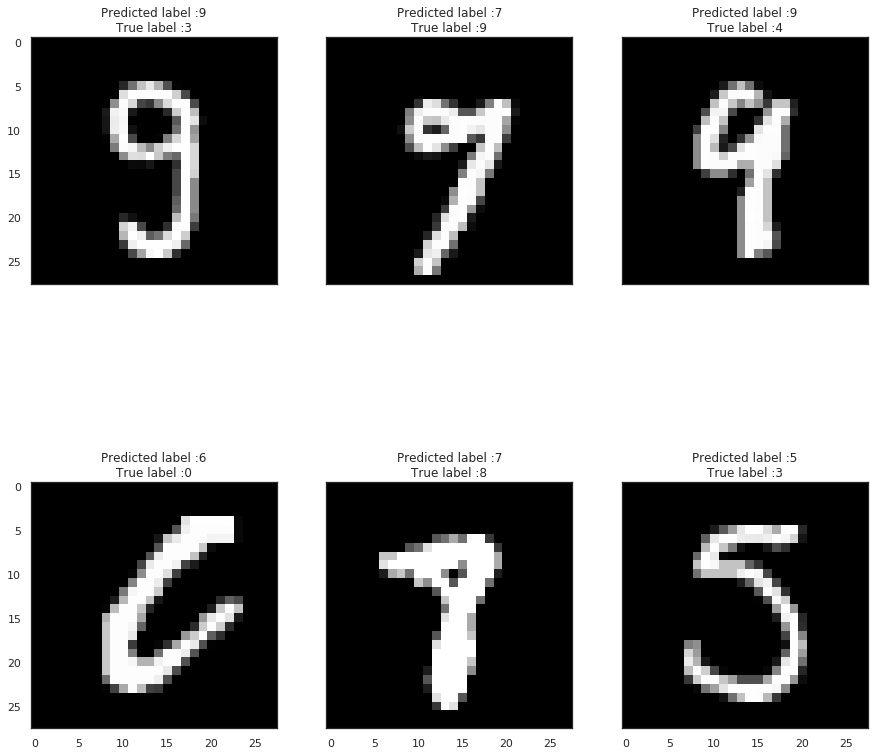

In [279]:
display_errors(most_important_errors, x_val_errors, pred_classes_errors, y_true_errors)